# [Lab Session 2](otsu.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

In [2]:
imgf = plt.imread("data/NIH3T3/im/dna-0.png")

**[Task 1.2.]()** Quantify the image into 256 bins:

In [3]:
img8 = (imgf * 255).round().astype(np.uint8)

**[Task 1.3.]()** Compute the image histogram:

In [4]:
h = np.zeros(255)

for x in range(255):
     h[x]= np.sum(img8 == x)

Show the computed histogram:

<BarContainer object of 255 artists>

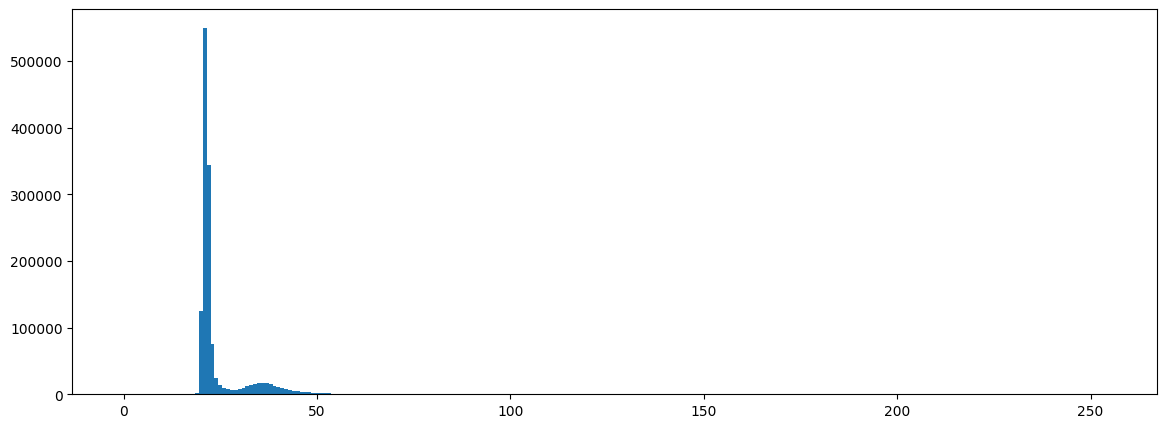

In [5]:
plt.figure(figsize=(14,5))
plt.bar(range(255), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [6]:
totalpix = img8.shape

T = 25
h1 = h[0:T]
h2 = h[T:256]

Nh1 = np.sum(h1)
Nh2 = np.sum(h2)

#mean intensity
intensity_1 = 0
for i in range(len(h1)):
    intensity_1 += i * h1[i]

mean_intensity_1 = 1/Nh1 * intensity_1

intensity_2 = 0
for i in range(len(h2)):
    intensity_2 += i * h2[i]
mean_intensity_2 = 1/Nh1 * intensity_2

#intensity variance
variance_1 = 0
for i in range(len(h1)):
    variance_1 += (i - mean_intensity_1)**2 * h1[i]
intensity_variance_1 = 1/Nh1 * variance_1

variance_2 = 0
for i in range(len(h2)):
    variance_2 += (i - mean_intensity_2)**2 * h2[i]
intensity_variance_2 = 1/Nh1 * variance_2

    


**[Task 1.5.]()** Perform Otsu thresholding:

In [7]:
mini= float('inf')
best_T = 0

for T in range(0,256):
    h1 = h[0:T]
    h2 = h[T:256]

    # Number of pixels
    Nh1 = np.sum(h1)
    Nh2 = np.sum(h2)

    #mean intensity
    intensity_1 = 0
    for i in range(len(h1)):
        intensity_1 += i * h1[i]

    mean_intensity_1 = 1/Nh1 * intensity_1

    intensity_2 = 0
    for i in range(len(h2)):
        intensity_2 += (T+i) * h2[i]
    mean_intensity_2 = 1/Nh2 * intensity_2

    #intensity variance
    variance_1 = 0
    for i in range(len(h1)):
        variance_1 += (i - mean_intensity_1)**2 * h1[i]
    intensity_variance_1 = 1/Nh1 * variance_1

    variance_2 = 0
    for i in range(len(h2)):
        variance_2 += (T+i - mean_intensity_2)**2 * h2[i]
    intensity_variance_2 = 1/Nh2 * variance_2

    # otsu equation
    Otsu = Nh1 * intensity_variance_1 + Nh2 * intensity_variance_2

    if Otsu < mini:
        mini = Otsu
        best_T = T
print(best_T)

threshold = 31
otsu_image =(img8 >= threshold)
truth = plt.imread("data/NIH3T3/gt/0.png")

31


/tmp/ipykernel_16626/1102431117.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  mean_intensity_1 = 1/Nh1 * intensity_1
/tmp/ipykernel_16626/1102431117.py:17: RuntimeWarning: invalid value encountered in scalar multiply
  mean_intensity_1 = 1/Nh1 * intensity_1
/tmp/ipykernel_16626/1102431117.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  intensity_variance_1 = 1/Nh1 * variance_1
/tmp/ipykernel_16626/1102431117.py:28: RuntimeWarning: invalid value encountered in scalar multiply
  intensity_variance_1 = 1/Nh1 * variance_1
/tmp/ipykernel_16626/1102431117.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  mean_intensity_2 = 1/Nh2 * intensity_2
/tmp/ipykernel_16626/1102431117.py:22: RuntimeWarning: invalid value encountered in scalar multiply
  mean_intensity_2 = 1/Nh2 * intensity_2
/tmp/ipykernel_16626/1102431117.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  intensity_variance_2 = 1/Nh2 * variance_2
/tmp/ipy

**[Task 1.6.]()** Compute the Dice coefficient:

In [8]:
Dicer = 2*np.sum(otsu_image * truth)/(otsu_image.sum() + truth.sum())
print (Dicer)

0.8943783223933183


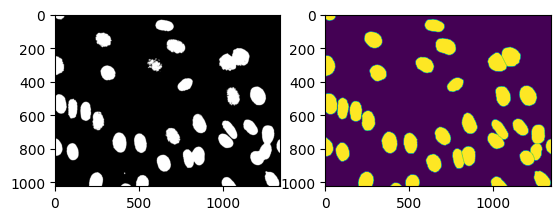

In [9]:
plt.subplot(1,2,1)
plt.imshow(otsu_image, cmap="grey")

plt.subplot(1,2,2)
plt.imshow(truth)
